<p style="font-size:32px;text-align:center"> <b>Social network Graph Link Prediction - Facebook Challenge</b> </p>

In [1]:
#Importing Libraries
# please do go through this python notebook: 
import warnings
warnings.filterwarnings("ignore")

import csv
import pandas as pd#pandas to create small dataframes 
import datetime #Convert to unix time
import time #Convert to unix time
# if numpy is not installed already : pip3 install numpy
import numpy as np#Do aritmetic operations on arrays
# matplotlib: used to plot graphs
import matplotlib
import matplotlib.pylab as plt
import seaborn as sns#Plots
from matplotlib import rcParams#Size of plots  
from sklearn.cluster import MiniBatchKMeans, KMeans#Clustering
import math
import pickle
import os
# to install xgboost: pip3 install xgboost
import xgboost as xgb

import warnings
import networkx as nx
import pdb
import pickle
from pandas import HDFStore,DataFrame
from pandas import read_hdf
from scipy.sparse.linalg import svds, eigs
import gc
from tqdm import tqdm

from sklearn.metrics import f1_score

In [2]:
from pandas import read_hdf
df_final_train = read_hdf(r'D:\AI & ML\Case Studies\Facebook Friend Recommendation\Feature Sample\storage_sample_stage4.h5', 'train_df',mode='a')
df_final_test = read_hdf(r'D:\AI & ML\Case Studies\Facebook Friend Recommendation\Feature Sample\storage_sample_stage4.h5', 'test_df',mode='a')

In [3]:
y_train = df_final_train.indicator_link
y_test = df_final_test.indicator_link

## Preferential Attachments 

In [4]:
def preferential_attachments_followers(a,b):
    preference_score=0
    try:
        if len(set(train_graph.predecessors(a)))==0 | len(set(train_graph.predecessors(b)))==0:
            return preference_score
        else:
            preference_score=(len(set(train_graph.predecessors(a))) * len(set(train_graph.predecessors(b))))
            return preference_score
    except:
        return preference_score

In [5]:
def preferential_attachments_followees(a,b):
    preference_score=0
    try:
        if len(set(train_graph.successors(a)))==0 | len(set(train_graph.successors(b)))==0:
            return preference_score
        else:
            preference_score=(len(set(train_graph.successors(a))) * len(set(train_graph.successors(b))))
            return preference_score
    except:
        return preference_score

## SVD_DOT

In [6]:
def svd_dot_source(a,b,c,d,e,f,g,h,i,j,k,l):
    svd_product=0
    try:
        svd_product=(a*g)+(b*h)+(c*i)+(d*j)+(e*k)+(f*l)
    except:
        return svd_product
    return svd_product

In [7]:
def svd_dot_destination(a,b,c,d,e,f,g,h,i,j,k,l):
    svd_product=0
    try:
        svd_product=(a*g)+(b*h)+(c*i)+(d*j)+(e*k)+(f*l)
    except:
        return svd_product
    return svd_product

In [8]:
df_final_train['svd_dot_source']=df_final_train.apply(lambda row:svd_dot_source(row['svd_u_s_1'],row['svd_u_s_2'],row['svd_u_s_3']\
            ,row['svd_u_s_4'],row['svd_u_s_5'],row['svd_u_s_6'],row['svd_u_d_1'],row['svd_u_d_2'],row['svd_u_d_3'],row['svd_u_d_4']\
            ,row['svd_u_d_5'],row['svd_u_d_6']),axis=1)
df_final_test['svd_dot_source']=df_final_test.apply(lambda row:svd_dot_source(row['svd_u_s_1'],row['svd_u_s_2'],row['svd_u_s_3']\
            ,row['svd_u_s_4'],row['svd_u_s_5'],row['svd_u_s_6'],row['svd_u_d_1'],row['svd_u_d_2'],row['svd_u_d_3'],row['svd_u_d_4']\
            ,row['svd_u_d_5'],row['svd_u_d_6']),axis=1)

df_final_train['svd_dot_destination']=df_final_train.apply(lambda row:svd_dot_destination(row['svd_v_s_1'],row['svd_v_s_2'],row['svd_v_s_3']\
            ,row['svd_v_s_4'],row['svd_v_s_5'],row['svd_v_s_6'],row['svd_v_d_1'],row['svd_v_d_2'],row['svd_v_d_3'],row['svd_v_d_4']\
            ,row['svd_v_d_5'],row['svd_v_d_6']),axis=1)
df_final_test['svd_dot_destination']=df_final_test.apply(lambda row:svd_dot_destination(row['svd_v_s_1'],row['svd_v_s_2'],row['svd_v_s_3']\
            ,row['svd_v_s_4'],row['svd_v_s_5'],row['svd_v_s_6'],row['svd_v_d_1'],row['svd_v_d_2'],row['svd_v_d_3'],row['svd_v_d_4']\
            ,row['svd_v_d_5'],row['svd_v_d_6']),axis=1)

In [9]:
df_final_train['preferential_followers']=df_final_train.apply(lambda row:preferential_attachments_followers(row['source_node'],row['destination_node']),axis=1)
df_final_test['preferential_followers']=df_final_test.apply(lambda row:preferential_attachments_followers(row['source_node'],row['destination_node']),axis=1)
df_final_train['preferential_followees']=df_final_train.apply(lambda row:preferential_attachments_followees(row['source_node'],row['destination_node']),axis=1)
df_final_test['preferential_followees']=df_final_test.apply(lambda row:preferential_attachments_followees(row['source_node'],row['destination_node']),axis=1)


In [10]:
df_final_train.drop(['source_node', 'destination_node','indicator_link'],axis=1,inplace=True)
df_final_test.drop(['source_node', 'destination_node','indicator_link'],axis=1,inplace=True)

Estimators =  10 Train Score 0.9210492696844526 test Score 0.9162413689582708
Estimators =  20 Train Score 0.9297696241235701 test Score 0.9232012246980779
Estimators =  50 Train Score 0.9672936481408329 test Score 0.9244996199645301
Estimators =  100 Train Score 0.9734604639863962 test Score 0.9263935156697575
Estimators =  200 Train Score 0.9765255368191192 test Score 0.9088356622967105
Estimators =  500 Train Score 0.9829829225068472 test Score 0.8965713037781176


Text(0.5, 1.0, 'Estimators vs score')

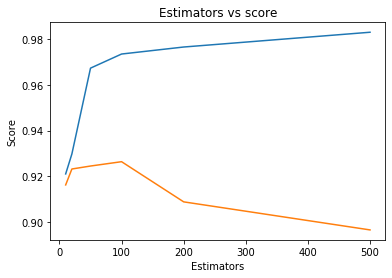

In [11]:
import xgboost as xgb
estimators=[10,20,50,100,200,500]
train_scores = []
test_scores = []
for i in estimators:
    model=xgb.XGBClassifier(n_estimators=i)
    model.fit(df_final_train,y_train)
    train_sc=f1_score(y_train,model.predict(df_final_train))
    test_sc=f1_score(y_test,model.predict(df_final_test))
    train_scores.append(train_sc)
    test_scores.append(test_sc)
    print('Estimators = ',i,'Train Score',train_sc,'test Score',test_sc)
plt.plot(estimators,train_scores,label='Train Score')
plt.plot(estimators,test_scores,label='Test Score')
plt.xlabel('Estimators')
plt.ylabel('Score')
plt.title('Estimators vs score')

  0%|                                                                                            | 0/5 [00:00<?, ?it/s]

Depth:  1  Train Score:  0.9266532059798926  Test Score:  0.9164077526261282


 20%|████████████████▊                                                                   | 1/5 [00:34<02:16, 34.07s/it]

Depth:  5  Train Score:  0.9765497697484945  Test Score:  0.9299743627772951


 40%|█████████████████████████████████▌                                                  | 2/5 [02:16<02:43, 54.52s/it]

Depth:  10  Train Score:  0.9895767371267176  Test Score:  0.9282412316043939


 60%|██████████████████████████████████████████████████▍                                 | 3/5 [05:17<03:05, 92.56s/it]

Depth:  50  Train Score:  1.0  Test Score:  0.9310556248546481


 80%|██████████████████████████████████████████████████████████████████▍                | 4/5 [10:31<02:38, 158.92s/it]

Depth:  100  Train Score:  1.0  Test Score:  0.9310556248546481


100%|███████████████████████████████████████████████████████████████████████████████████| 5/5 [15:39<00:00, 187.92s/it]


Text(0.5, 1.0, 'F1 Scores vs Depths At 100 as estimator')

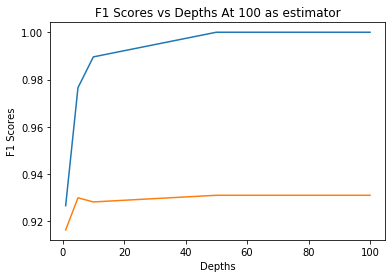

In [14]:
best_estimator=100
train_scores=[]
test_scores=[]
depths=[1,5,10,50,100]
for i in tqdm(depths):
    model=xgb.XGBClassifier(n_estimators=best_estimator,max_depth=i)
    model.fit(df_final_train,y_train)
    train_sc=f1_score(y_train,model.predict(df_final_train))
    test_sc=f1_score(y_test,model.predict(df_final_test))
    train_scores.append(train_sc)
    test_scores.append(test_sc)
    print("Depth: ",i," Train Score: ",train_sc," Test Score: ",test_sc)
plt.plot(depths,train_scores,label="Train Scores")
plt.plot(depths,test_scores,label="Test Scores")
plt.xlabel("Depths")
plt.ylabel("F1 Scores")
plt.title("F1 Scores vs Depths At 100 as estimator")

In [19]:
best_estimators=100
best_depth=50
best_model=xgb.XGBClassifier(n_estimators=best_estimators,max_depth=best_depth)
best_model.fit(df_final_train,y_train)
train_score=f1_score(y_train,best_model.predict(df_final_train))
test_score=f1_score(y_test,best_model.predict(df_final_test))
print("Train F1 Score: ",train_score)
print("Test F1 Score: ",test_score)

Train F1 Score:  1.0
Test F1 Score:  0.9310556248546481


In [20]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    
    A =(((C.T)/(C.sum(axis=1))).T)
    
    B =(C/C.sum(axis=0))
    plt.figure(figsize=(20,4))
    
    labels = [0,1]
    # representing A in heatmap format
    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

Train confusion_matrix


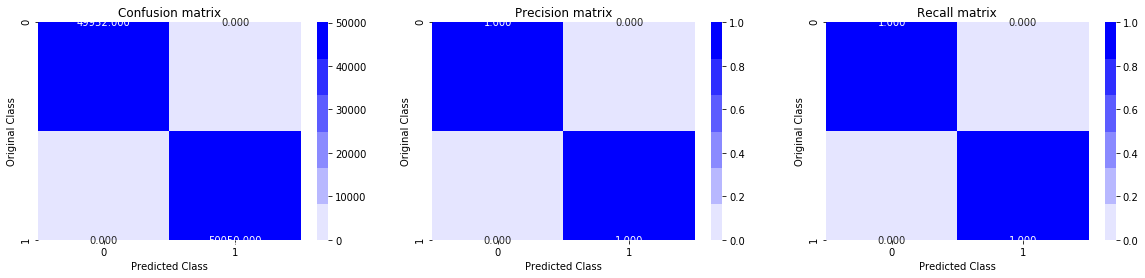

Test confusion_matrix


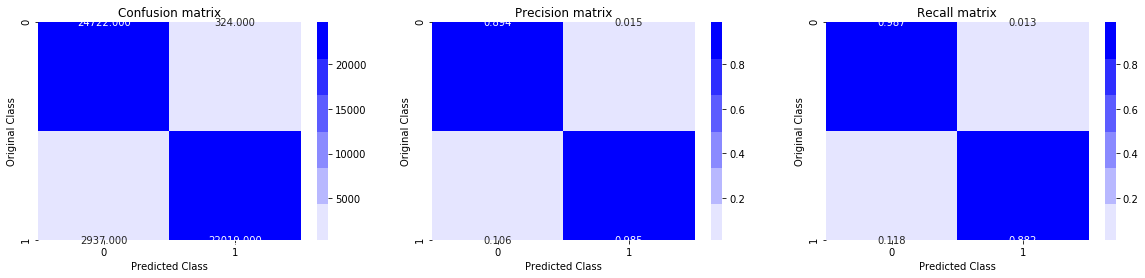

In [22]:
print('Train confusion_matrix')
plot_confusion_matrix(y_train,best_model.predict(df_final_train))
print('Test confusion_matrix')
plot_confusion_matrix(y_test,best_model.predict(df_final_test))

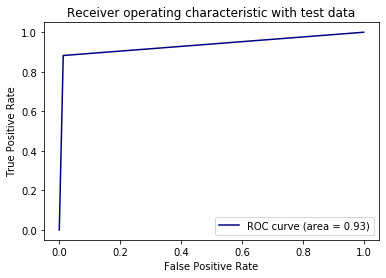

In [23]:
from sklearn.metrics import roc_curve, auc
fpr,tpr,ths = roc_curve(y_test,best_model.predict(df_final_test))
auc_sc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='navy',label='ROC curve (area = %0.2f)' % auc_sc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic with test data')
plt.legend()
plt.show()

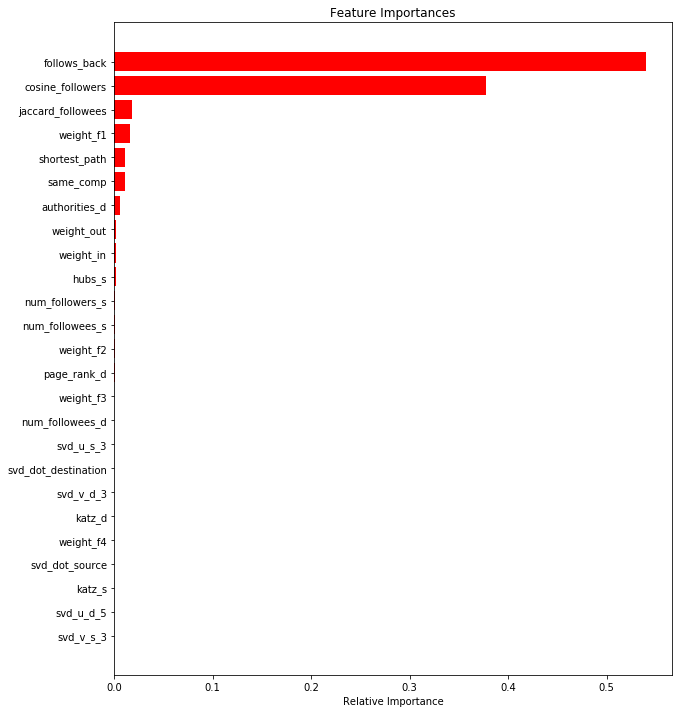

In [25]:
features = df_final_train.columns
importances = best_model.feature_importances_
indices = (np.argsort(importances))[-25:]
plt.figure(figsize=(10,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='r', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## Observation

In [ ]:
1. Though we added Preferential Attachment as a feature here but it is not helping us as it has got no place in the above plot.
2. We also added SVD_dot for source and destination and we can see that SVD_dot for destination is bit more important then SVD_dot
   for the source.
3. But still this new features don't add much value.    